## Import Libraries and Making Directories

In [1]:
import shutil
import os
import dicom2nifti
import nibabel
import numpy as np
from glob import glob

dicom2nifti.settings.disable_validate_slice_increment()

## Create groups of 64 slices

In [2]:
input_path_images = "./Heart/dicom_file/images/*"
input_path_labels = "./Heart/dicom_file/labels/*"
output_path_images = "./Heart/dicom_groups/images"
output_path_labels = "./Heart/dicom_groups/labels"

list_images = glob(input_path_images)
list_labels = glob(input_path_labels)

In [3]:
num_slices = 64

for patient_image, patient_label in zip(list_images, list_labels):
    patient_name = os.path.basename(os.path.normpath(patient_image))
    num_folders = int(len(glob(patient_image + "/*")) / num_slices)
    
    for i in range(num_folders):
        path_image_name = os.path.join(output_path_images, patient_name + "_" + str(i))
        path_label_name = os.path.join(output_path_labels, patient_name + "_" + str(i))
        
        if os.path.exists(path_image_name) or os.path.exists(path_label_name):
            print(str(path_image_name) + " already exists")
            print(str(path_label_name) + " already exists")
            continue
            
        os.mkdir(path_image_name)
        os.mkdir(path_label_name)
        
        ind = 0
        for image_file, label_file in zip(glob(patient_image + "/*"), glob(patient_label + "/*")):
            if ind == num_slices:
                break
            
            shutil.copy(image_file, path_image_name)
            print("Copied to " + path_image_name)
            
            shutil.copy(label_file, path_label_name)
            print("Copied to " + path_label_name)
            
            ind+=1

./Heart/dicom_groups/images/la_011_0 already exists
./Heart/dicom_groups/labels/la_011_0 already exists
./Heart/dicom_groups/images/la_016_0 already exists
./Heart/dicom_groups/labels/la_016_0 already exists
./Heart/dicom_groups/images/la_029_0 already exists
./Heart/dicom_groups/labels/la_029_0 already exists
./Heart/dicom_groups/images/la_020_0 already exists
./Heart/dicom_groups/labels/la_020_0 already exists
./Heart/dicom_groups/images/la_018_0 already exists
./Heart/dicom_groups/labels/la_018_0 already exists
./Heart/dicom_groups/images/la_026_0 already exists
./Heart/dicom_groups/labels/la_026_0 already exists
./Heart/dicom_groups/images/la_019_0 already exists
./Heart/dicom_groups/labels/la_019_0 already exists
./Heart/dicom_groups/images/la_021_0 already exists
./Heart/dicom_groups/labels/la_021_0 already exists
./Heart/dicom_groups/images/la_017_0 already exists
./Heart/dicom_groups/labels/la_017_0 already exists
./Heart/dicom_groups/images/la_010_0 already exists
./Heart/dico

## Convert dicom files to nifti files

In [4]:
input_path_images = "./Heart/dicom_groups/images/*"
input_path_labels = "./Heart/dicom_groups/labels/*"
output_path_images = "./Heart/nifti_files/images"
output_path_labels = "./Heart/nifti_files/labels"

list_images = glob(input_path_images)
list_labels = glob(input_path_labels)

In [5]:
for patient_image, patient_label in zip(list_images, list_labels):
    patient_name = os.path.basename(os.path.normpath(patient_image))
    path_image_name = os.path.join(output_path_images, patient_name + '.nii.gz')
    path_label_name = os.path.join(output_path_labels, patient_name + '.nii.gz')
    
    if os.path.exists(path_image_name) or os.path.exists(path_label_name):
        print(str(path_image_name) + " already exists.")
        print(str(path_label_name) + " already exists.")
        continue
        
    dicom2nifti.dicom_series_to_nifti(patient_image, path_image_name)
    print("Copied to " + path_image_name)

    dicom2nifti.dicom_series_to_nifti(patient_label, path_label_name)
    print("Copied to " + path_label_name)

./Heart/nifti_files/images/la_021_0.nii.gz already exists.
./Heart/nifti_files/labels/la_021_0.nii.gz already exists.
./Heart/nifti_files/images/la_004_0.nii.gz already exists.
./Heart/nifti_files/labels/la_004_0.nii.gz already exists.
./Heart/nifti_files/images/la_014_0.nii.gz already exists.
./Heart/nifti_files/labels/la_014_0.nii.gz already exists.
./Heart/nifti_files/images/la_010_0.nii.gz already exists.
./Heart/nifti_files/labels/la_010_0.nii.gz already exists.
./Heart/nifti_files/images/la_026_0.nii.gz already exists.
./Heart/nifti_files/labels/la_026_0.nii.gz already exists.
./Heart/nifti_files/images/la_007_1.nii.gz already exists.
./Heart/nifti_files/labels/la_007_1.nii.gz already exists.
./Heart/nifti_files/images/la_009_0.nii.gz already exists.
./Heart/nifti_files/labels/la_009_0.nii.gz already exists.
./Heart/nifti_files/images/la_003_0.nii.gz already exists.
./Heart/nifti_files/labels/la_003_0.nii.gz already exists.
./Heart/nifti_files/images/la_007_0.nii.gz already exist

## Find Empty

In [6]:
input_nifti_file_path = "./Heart/nifti_files/labels/*"

for patient_label in glob(input_nifti_file_path):
    nifti_file = nibabel.load(patient_label)
    fdata = nifti_file.get_fdata()
    if len(np.unique(fdata)) == 1:
        print("Segment not found at " + patient_label)
        
        if input("Delete this file[Y|n]: ") in "Yy":
            os.remove(patient_label)
            print("Deleted")
        else:
            print("Not Deleted")

## Preprocessing

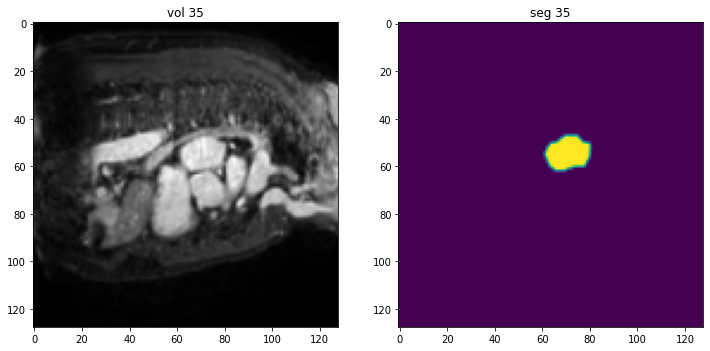

In [1]:
from utilities import prepare, show_patient

data = prepare("Task_Heart", a_min=0, a_max=1435.2)
show_patient(data, SLICE_NUMBER=35)